# ICP05-DTrees

# Rodgers Okeyo Ochieng

Description: Create a new notebook. Use the data from airbnb with a target of price_gte_150 to fit a Decision tree model using the randomsearch/gridsearch approach demonstrated in the tutorial. Use precision as the scoring measure to optimize.

Create a discussion section at the end of your notebook. In this section, present and discuss your findings.

## Import all needed files

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

np.random.seed(8085)

## Load data

In [3]:
X_train = pd.read_csv('airbnb_train_X_price_gte_150.csv') 
y_train = pd.read_csv('airbnb_train_y_price_gte_150.csv') 
X_test = pd.read_csv('airbnb_test_X_price_gte_150.csv') 
y_test = pd.read_csv('airbnb_test_y_price_gte_150.csv') 

## Take a quick view of the data

In [25]:
print(X_train.describe())

       host_is_superhost  host_identity_verified      latitude     longitude  \
count        2488.000000             2488.000000  2.488000e+03  2.488000e+03   
mean            0.115756                0.729904 -2.171296e-13  4.025076e-14   
std             0.319996                0.444099  1.000201e+00  1.000201e+00   
min             0.000000                0.000000 -4.177386e+00 -2.747088e+00   
25%             0.000000                0.000000 -4.293780e-01 -6.461748e-01   
50%             0.000000                1.000000  2.177632e-01  2.020043e-01   
75%             0.000000                1.000000  6.057684e-01  7.178436e-01   
max             1.000000                1.000000  2.014636e+00  2.693799e+00   

         room_type  accommodates     bathrooms      bedrooms          beds  \
count  2488.000000  2.488000e+03  2.488000e+03  2.488000e+03  2.488000e+03   
mean      0.428055  1.028116e-16  2.141909e-16 -1.399381e-16  1.028116e-16   
std       0.539222  1.000201e+00  1.000201e+0

## Model the data 

So when performing a crandomized search I kept getting the error I was getting and so I thought of doing some elimination. I found out that the max_depth parameters bring an error when we increase it by more than 10. SO I used 8 and it was lower. If I had time, I would have done more test to see which parameters performed better. At the moment, the range below gave the highest Accuracy score of 0.86

In [18]:
score_measure = "precision"
kfolds = 5

param_grid = {
    'min_samples_split': np.arange(2,200),
    'min_samples_leaf': np.arange(1,200),
    'min_impurity_decrease': np.arange(0.0001, 0.001, 0.00005),
    'max_leaf_nodes': np.arange(10, 200),
    'max_depth': np.arange(3,8),
    'criterion': ['entropy', 'gini'],
}

dtree = DecisionTreeClassifier()
rand_search = RandomizedSearchCV(estimator = dtree, param_distributions=param_grid, cv=kfolds, n_iter=1000,
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = rand_search.fit(X_train, y_train)

print(f"The best {score_measure} score is {rand_search.best_score_}")
print(f"... with parameters: {rand_search.best_params_}")

bestRecallTree = rand_search.best_estimator_

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
The best precision score is 0.8469632575150315
... with parameters: {'min_samples_split': 146, 'min_samples_leaf': 2, 'min_impurity_decrease': 0.00015000000000000001, 'max_leaf_nodes': 177, 'max_depth': 7, 'criterion': 'entropy'}


In [19]:
c_matrix = confusion_matrix(y_test, rand_search.predict(X_test))
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
print(f"Accuracy={(TP+TN)/(TP+TN+FP+FN):.7f} Precision={TP/(TP+FP):.7f} Recall={TP/(TP+FN):.7f} F1={2*TP/(2*TP+FP+FN):.7f}")

Accuracy=0.8462980 Precision=0.8354662 Recall=0.8606403 F1=0.8478664


In [20]:
score_measure = "precision"

kfolds = 5
min_samples_split = rand_search.best_params_['min_samples_split']
min_samples_leaf = rand_search.best_params_['min_samples_leaf']
min_impurity_decrease = rand_search.best_params_['min_impurity_decrease']
max_leaf_nodes = rand_search.best_params_['max_leaf_nodes']
max_depth = rand_search.best_params_['max_depth']
criterion = rand_search.best_params_['criterion']

param_grid = {
    'min_samples_split': np.arange(min_samples_split-2,min_samples_split+2),  
    'min_samples_leaf': np.arange(min_samples_leaf-2,min_samples_leaf+2),
    'min_impurity_decrease': np.arange(min_impurity_decrease-0.0001, min_impurity_decrease+0.0001, 0.00005),
    'max_leaf_nodes': np.arange(max_leaf_nodes-2,max_leaf_nodes+2), 
    'max_iter': np.arange(max_depth-2,max_depth+2), 
    'criterion': [criterion]
}

dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid=param_grid, cv=kfolds, 
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = grid_search.fit(X_train, y_train)

print(f"The best {score_measure} score is {grid_search.best_score_}")
print(f"... with parameters: {grid_search.best_params_}")

bestRecallTree = grid_search.best_estimator_

Fitting 5 folds for each of 1024 candidates, totalling 5120 fits
The best precision score is 0.8473108375276428
... with parameters: {'criterion': 'entropy', 'max_depth': 8, 'max_leaf_nodes': 175, 'min_impurity_decrease': 5.000000000000001e-05, 'min_samples_leaf': 2, 'min_samples_split': 144}


C:\Users\ochie\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1280 fits failed out of a total of 5120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1280 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ochie\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ochie\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "C:\Users\ochie\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\Users\ochie\miniconda3\lib\site-packages\sklearn\base.

In [23]:
c_matrix = confusion_matrix(y_test, grid_search.predict(X_test))
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
print(f"Accuracy={(TP+TN)/(TP+TN+FP+FN):.4f} Precision={TP/(TP+FP):.4f} Recall={TP/(TP+FN):.4f} F1={2*TP/(2*TP+FP+FN):.4f}")

Accuracy=0.8463 Precision=0.8355 Recall=0.8606 F1=0.8479


In [21]:
np.round(grid_search.best_estimator_.feature_importances_,2)

array([0.  , 0.  , 0.06, 0.1 , 0.65, 0.01, 0.01, 0.06, 0.  , 0.  , 0.01,
       0.  , 0.  , 0.01, 0.01, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.01, 0.03, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  ])

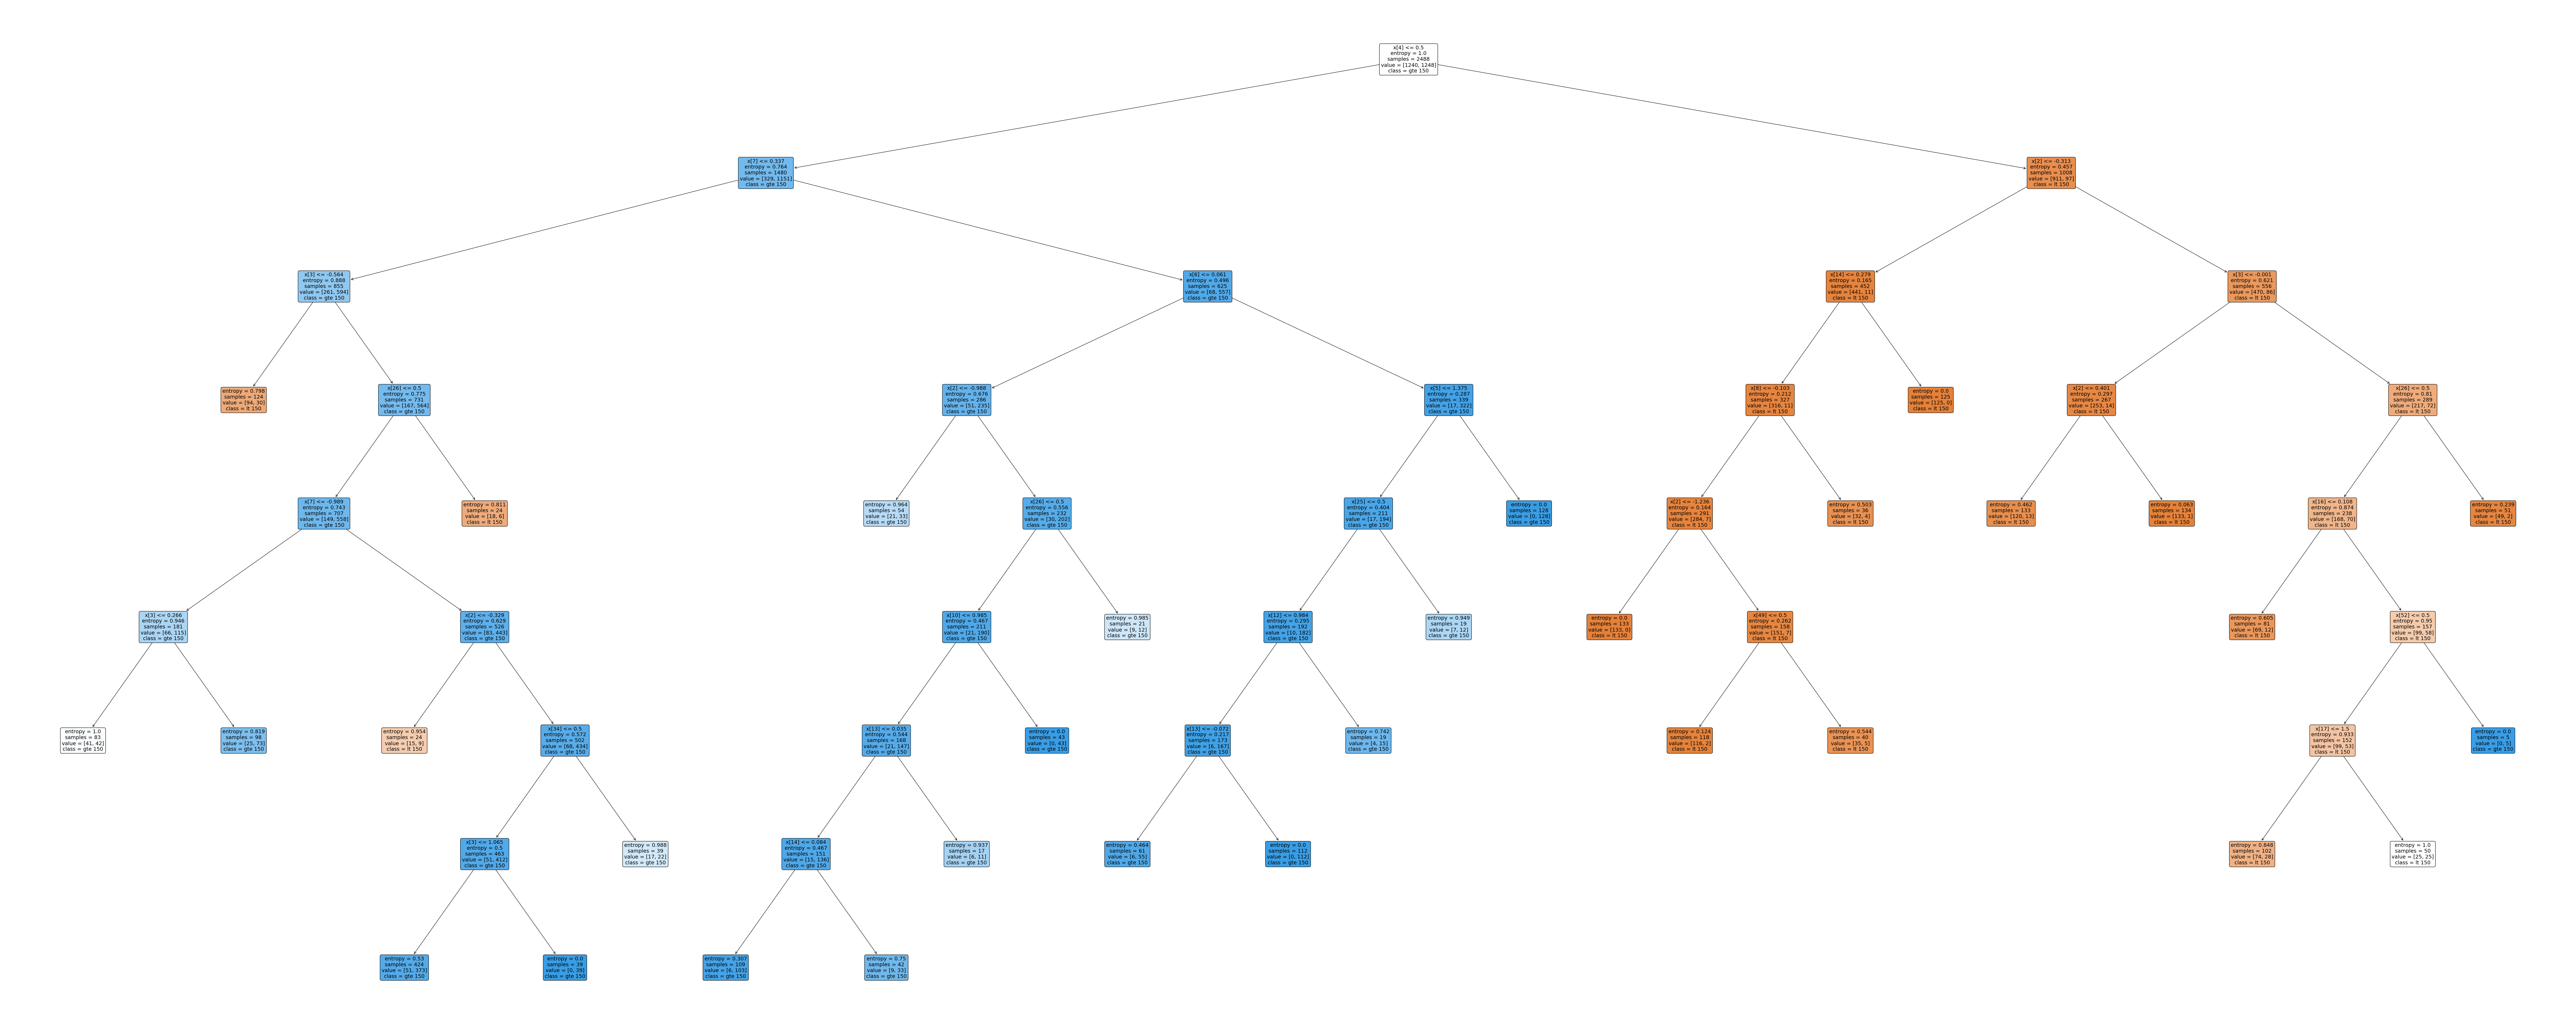

In [24]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(125,50))
tree = plot_tree(grid_search.best_estimator_, 
              #feature_names=train_inputs.columns.values, # our feature names are stripped from the data set
              class_names=['lt 150', 'gte 150'], 
              filled=True, 
              rounded=True, 
              fontsize=14)

## Discussion
So when performing a crandomized search I kept getting the error I was getting and so I thought of doing some elimination. I found out that the max_depth parameters bring an error when we increase it by more than 10. SO I used 8 and it was lower. If I had time, I would have done more test to see which parameters performed better. At the moment, the range below gave the highest Accuracy score of 0.86
Looking at the tree, I can see that the model is doing a good job in predicting. I particularly like the left tree of the orange variables. They do  good job in doing a good prediction. 
From the feature importance, I noticed that the feature in index 4 is very important accounting for almost 65%.